In [1]:
from datasets import load_dataset

ds = load_dataset("google/code_x_glue_cc_clone_detection_big_clone_bench")

In [21]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'id1', 'id2', 'func1', 'func2', 'label'],
        num_rows: 901028
    })
    validation: Dataset({
        features: ['id', 'id1', 'id2', 'func1', 'func2', 'label'],
        num_rows: 415416
    })
    test: Dataset({
        features: ['id', 'id1', 'id2', 'func1', 'func2', 'label'],
        num_rows: 415416
    })
})

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 200)
sns.set_theme(style="whitegrid")

print("Splits available:", list(ds.keys()))

df_train = ds["train"].to_pandas()
df_val   = ds["validation"].to_pandas()
df_test  = ds["test"].to_pandas()

for name, df in [("train", df_train), ("val", df_val), ("test", df_test)]:
    print(name, df.shape)
    display(df.head(2))

Splits available: ['train', 'validation', 'test']
train (901028, 6)


,id,id1,id2,func1,func2,label
0,0,13988825,8660836,"private void setNodekeyInJsonResponse(String service) throws Exception {\n String filename = this.baseDirectory + service + "".json"";\n Scanner s = new Scanner(new File(filename))...","public void transform(String style, String spec, OutputStream out) throws IOException {\n URL url = new URL(rootURL, spec);\n InputStream in = new PatchXMLSymbolsStream(new Strip...",False
1,1,80378,18548122,public static void test(String args[]) {\n int trace;\n int bytes_read = 0;\n int last_contentLenght = 0;\n try {\n BufferedReader reader;\n U...,private static String loadUrlToString(String a_url) throws IOException {\n URL l_url1 = new URL(a_url);\n BufferedReader br = new BufferedReader(new InputStreamReader(l_url1.open...,True


val (415416, 6)


,id,id1,id2,func1,func2,label
0,0,13653451,21955002,"public ViewInitListener() throws IOException {\n URL url = this.getClass().getResource(VIEW_INIT_CONFIG);\n log.debug(""Loading configuration from: "" + url);\n config = new...","public void run() {\n String s, s2;\n s = """";\n s2 = """";\n try {\n URL url = new URL(""http://www.m-w.com/dictionary/"" + Word);\n BufferedReade...",False
1,1,1188160,8831513,"public static String urlContentToString(URL url, String encoding) throws IOException {\n String out = """";\n BufferedReader in = new BufferedReader(new InputStreamReader(url.openS...","public String sendMessage(String message, boolean log) {\n StringBuilder ret;\n try {\n URL url = new URL(this.stringURL);\n HttpURLConnection urlConnection...",False


test (415416, 6)


,id,id1,id2,func1,func2,label
0,0,2381663,4458076,@Test(expected = GadgetException.class)\n public void malformedGadgetSpecIsCachedAndThrows() throws Exception {\n HttpRequest request = createCacheableRequest();\n expect(pipe...,public InputStream getInputStream() throws TGBrowserException {\n try {\n if (!this.isFolder()) {\n URL url = new URL(this.url);\n InputStream s...,False
1,1,3809087,15757836,"private boolean getWave(String url, String Word) {\n try {\n File FF = new File(f.getParent() + ""/"" + f.getName() + ""pron"");\n FF.mkdir();\n URL url2 = ...",private int[] sort(int n) {\n int[] mas = new int[n];\n Random rand = new Random();\n for (int i = 0; i < n; i++) {\n mas[i] = rand.nextInt(10) + 1;\n }\...,False


In [23]:
def summarize_df(df: pd.DataFrame, name: str, sample_rows: int = 5):
    print(f"=== {name.upper()} ===")
    print("shape:", df.shape)
    print("columns:", list(df.columns))
    print("dtypes:\n", df.dtypes)
    print("nulls per column:\n", df.isna().sum().sort_values(ascending=False).head(20))
    print("duplicates (full-row):", df.duplicated().sum())
    display(df.head(sample_rows))
    if df.select_dtypes(include=np.number).shape[1] > 0:
        display(df.describe().T)

for name, df in [("train", df_train), ("validation", df_val), ("test", df_test)]:
    summarize_df(df, name)

=== TRAIN ===
shape: (901028, 6)
columns: ['id', 'id1', 'id2', 'func1', 'func2', 'label']
dtypes:
 id        int32
id1       int32
id2       int32
func1    object
func2    object
label      bool
dtype: object
nulls per column:
 id       0
id1      0
id2      0
func1    0
func2    0
label    0
dtype: int64
duplicates (full-row): 0


,id,id1,id2,func1,func2,label
0,0,13988825,8660836,"private void setNodekeyInJsonResponse(String service) throws Exception {\n String filename = this.baseDirectory + service + "".json"";\n Scanner s = new Scanner(new File(filename))...","public void transform(String style, String spec, OutputStream out) throws IOException {\n URL url = new URL(rootURL, spec);\n InputStream in = new PatchXMLSymbolsStream(new Strip...",False
1,1,80378,18548122,public static void test(String args[]) {\n int trace;\n int bytes_read = 0;\n int last_contentLenght = 0;\n try {\n BufferedReader reader;\n U...,private static String loadUrlToString(String a_url) throws IOException {\n URL l_url1 = new URL(a_url);\n BufferedReader br = new BufferedReader(new InputStreamReader(l_url1.open...,True
2,2,21354223,7421563,"public String kodetu(String testusoila) {\n MessageDigest md = null;\n try {\n md = MessageDigest.getInstance(""SHA"");\n md.update(testusoila.getBytes(""UTF-8...","private StringBuffer encoder(String arg) {\n if (arg == null) {\n arg = """";\n }\n MessageDigest md5 = null;\n try {\n md5 = MessageDigest.getI...",True
3,3,15826299,19728871,"public static void printResponseHeaders(String address) {\n logger.info(""Address: "" + address);\n try {\n URL url = new URL(address);\n URLConnection conn =...",public static String getEncodedPassword(String buff) {\n if (buff == null) return null;\n String t = new String();\n try {\n MessageDigest md = MessageDigest.ge...,False
4,4,9938081,11517213,"public void load(String fileName) {\n BufferedReader bufReader;\n loaded = false;\n vector.removeAllElements();\n try {\n if (fileName.startsWith(""http:""...","private static void copyFile(File sourceFile, File destFile) {\n try {\n if (!destFile.exists()) {\n destFile.createNewFile();\n }\n File...",False


,count,mean,std,min,25%,50%,75%,max
id,901028.0,4.505135e+05,2.601045e+05,0.0,225256.75,450513.5,675770.25,901027.0
id1,901028.0,1.140652e+07,7.145638e+06,74.0,5052218.00,11238287.0,17871427.00,23677151.0
id2,901028.0,1.140141e+07,7.142543e+06,74.0,5036265.00,11268952.0,17662157.00,23677151.0


=== VALIDATION ===
shape: (415416, 6)
columns: ['id', 'id1', 'id2', 'func1', 'func2', 'label']
dtypes:
 id        int32
id1       int32
id2       int32
func1    object
func2    object
label      bool
dtype: object
nulls per column:
 id       0
id1      0
id2      0
func1    0
func2    0
label    0
dtype: int64
duplicates (full-row): 0


,id,id1,id2,func1,func2,label
0,0,13653451,21955002,"public ViewInitListener() throws IOException {\n URL url = this.getClass().getResource(VIEW_INIT_CONFIG);\n log.debug(""Loading configuration from: "" + url);\n config = new...","public void run() {\n String s, s2;\n s = """";\n s2 = """";\n try {\n URL url = new URL(""http://www.m-w.com/dictionary/"" + Word);\n BufferedReade...",False
1,1,1188160,8831513,"public static String urlContentToString(URL url, String encoding) throws IOException {\n String out = """";\n BufferedReader in = new BufferedReader(new InputStreamReader(url.openS...","public String sendMessage(String message, boolean log) {\n StringBuilder ret;\n try {\n URL url = new URL(this.stringURL);\n HttpURLConnection urlConnection...",False
2,2,1141235,14322332,"public static void main(String[] args) {\n String u = ""http://portal.acm.org/results.cfm?query=%28Author%3A%22"" + ""Boehm%2C+Barry"" + ""%22%29&srt=score%20dsc&short=0&source_disp=&since_m...","protected byte[] mdDecode(String s, int type, byte[] salt) {\n try {\n MessageDigest md;\n StringBuffer hexString = new StringBuffer();\n if ((type == 5...",False
3,3,16765164,17526811,private void open() throws IOException {\n if (in != null) return;\n try {\n con = url.openConnection();\n in = con.getInputStream();\n ...,private String getDocumentAsString(URL url) throws IOException {\n StringBuffer result = new StringBuffer();\n InputStream in = url.openStream();\n int c;\n while (...,False
4,4,12442447,390730,public ActionResponse executeAction(ActionRequest request) throws Exception {\n ActionResponse resp = new ActionResponse();\n BufferedReader in = null;\n try {\n ...,public static void test(String args[]) {\n int trace;\n int bytes_read = 0;\n int last_contentLenght = 0;\n try {\n BufferedReader reader;\n U...,False


,count,mean,std,min,25%,50%,75%,max
id,415416.0,2.077075e+05,1.199204e+05,0.0,103853.75,207707.5,311561.25,415415.0
id1,415416.0,1.148849e+07,7.097388e+06,44949.0,5467907.00,11108280.0,17977185.00,23677141.0
id2,415416.0,1.146150e+07,7.082670e+06,44949.0,5510183.00,11167172.0,18036460.00,23677141.0


=== TEST ===
shape: (415416, 6)
columns: ['id', 'id1', 'id2', 'func1', 'func2', 'label']
dtypes:
 id        int32
id1       int32
id2       int32
func1    object
func2    object
label      bool
dtype: object
nulls per column:
 id       0
id1      0
id2      0
func1    0
func2    0
label    0
dtype: int64
duplicates (full-row): 0


,id,id1,id2,func1,func2,label
0,0,2381663,4458076,@Test(expected = GadgetException.class)\n public void malformedGadgetSpecIsCachedAndThrows() throws Exception {\n HttpRequest request = createCacheableRequest();\n expect(pipe...,public InputStream getInputStream() throws TGBrowserException {\n try {\n if (!this.isFolder()) {\n URL url = new URL(this.url);\n InputStream s...,False
1,1,3809087,15757836,"private boolean getWave(String url, String Word) {\n try {\n File FF = new File(f.getParent() + ""/"" + f.getName() + ""pron"");\n FF.mkdir();\n URL url2 = ...",private int[] sort(int n) {\n int[] mas = new int[n];\n Random rand = new Random();\n for (int i = 0; i < n; i++) {\n mas[i] = rand.nextInt(10) + 1;\n }\...,False
2,2,6987642,4921631,"public static String encodePassword(String password) {\n MessageDigest md;\n try {\n md = MessageDigest.getInstance(""SHA"");\n md.update(password.getBytes())...",public int create(BusinessObject o) throws DAOException {\n int insert = 0;\n int id = 0;\n Item item = (Item) o;\n try {\n PreparedStatement pst = conne...,False
3,3,21316706,4168534,"@Override\n protected URLConnection openConnection(URL url, Proxy proxy) throws IOException {\n if ((url == null) || (proxy == null)) {\n throw new IllegalArgumentExceptio...",public String insertSmsInf(Sms sms) throws Exception {\n String smsId = null;\n Connection conn = null;\n PreparedStatement pstmt = null;\n StringBuffer buffer = ne...,False
4,4,4798332,1473212,"public static String SHA(String source) {\n logger.info(source);\n String result = null;\n try {\n MessageDigest digest = MessageDigest.getInstance(""SHA"");\n ...","@Test\n public void test_validate_geo_getEvents() {\n try {\n SchemaFactory factory = SchemaFactory.newInstance(""http://www.w3.org/2001/XMLSchema"");\n File sche...",False


,count,mean,std,min,25%,50%,75%,max
id,415416.0,2.077075e+05,1.199204e+05,0.0,103853.75,207707.5,311561.25,415415.0
id1,415416.0,1.186166e+07,7.036251e+06,1362.0,5977352.00,12055086.0,18011804.00,23677147.0
id2,415416.0,1.181093e+07,7.102996e+06,1362.0,5744992.00,11645260.0,18211588.00,23677147.0


train: label value_counts
label
True     450862
False    450166
Name: count, dtype: int64


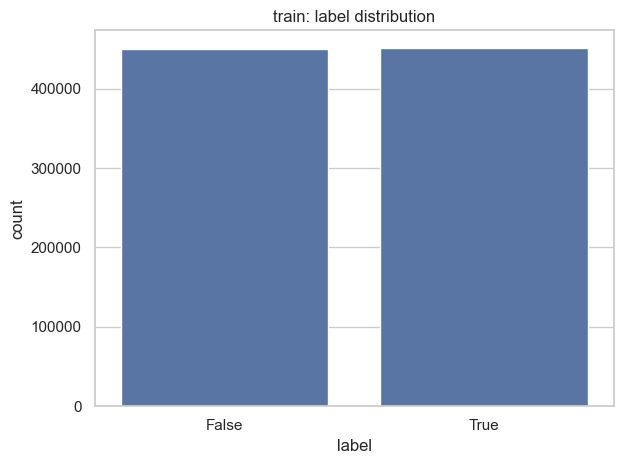

validation: label value_counts
label
False    361577
True      53839
Name: count, dtype: int64


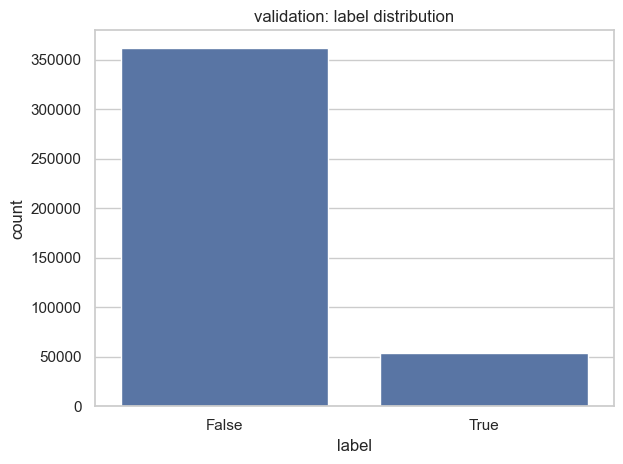

test: label value_counts
label
False    358596
True      56820
Name: count, dtype: int64


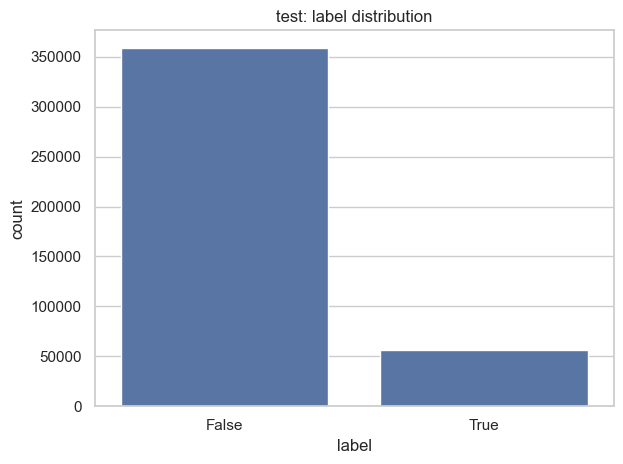

In [24]:
def plot_target(df, name):
    if "label" in df.columns:
        print(f"{name}: label value_counts")
        print(df["label"].value_counts(dropna=False))
        sns.countplot(data=df, x="label")
        plt.title(f"{name}: label distribution")
        plt.tight_layout()
        plt.show()

for name, df in [("train", df_train), ("validation", df_val), ("test", df_test)]:
    plot_target(df, name)

train: func1 length describe


count    901028.000000
mean       1578.632993
std        2436.967591
min         234.000000
25%         593.000000
50%         966.000000
75%        1682.000000
max       68541.000000
Name: func1__len, dtype: float64

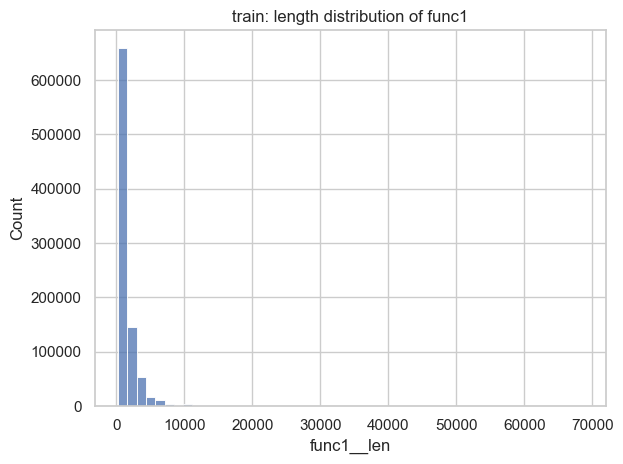

train: func2 length describe


count    901028.000000
mean       1604.961507
std        2604.719491
min         234.000000
25%         593.000000
50%         967.000000
75%        1708.000000
max       68541.000000
Name: func2__len, dtype: float64

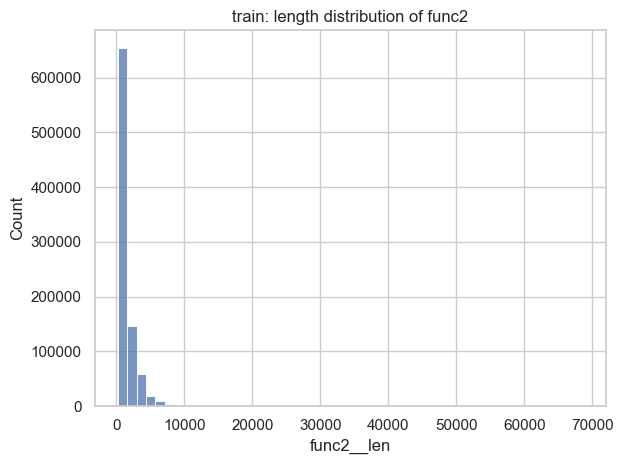

validation: func1 length describe


count    415416.000000
mean       1656.392696
std        2197.973726
min         240.000000
25%         656.000000
50%        1036.000000
75%        1804.000000
max       27430.000000
Name: func1__len, dtype: float64

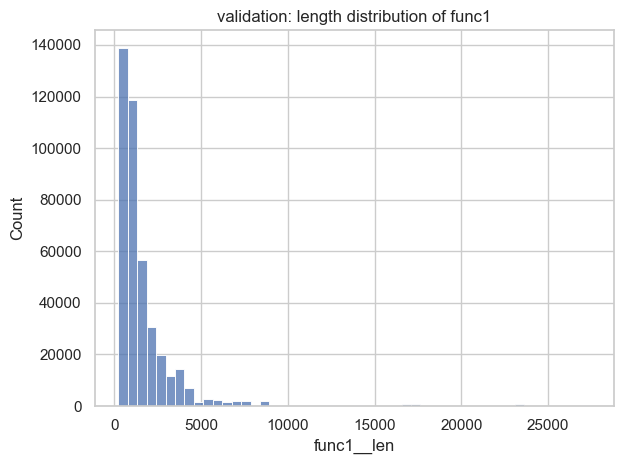

validation: func2 length describe


count    415416.000000
mean       1622.955989
std        2091.370468
min         240.000000
25%         635.000000
50%        1032.000000
75%        1747.000000
max       27430.000000
Name: func2__len, dtype: float64

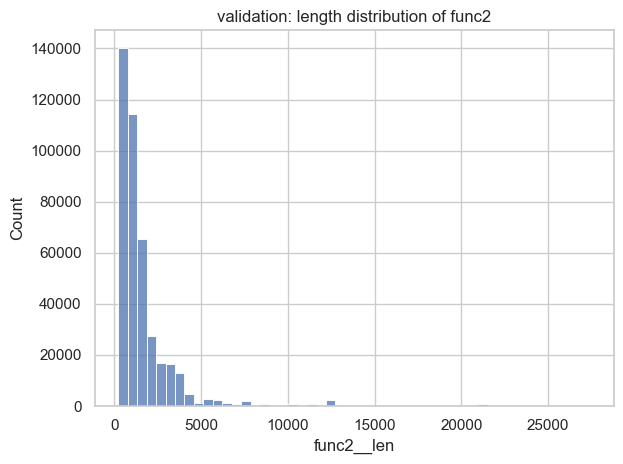

test: func1 length describe


count    415416.000000
mean       1452.683633
std        1822.191256
min         254.000000
25%         585.000000
50%         966.000000
75%        1626.000000
max       30771.000000
Name: func1__len, dtype: float64

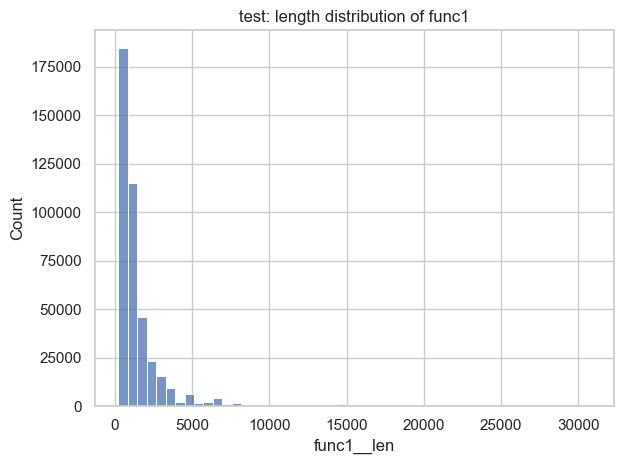

test: func2 length describe


count    415416.000000
mean       1464.963297
std        1930.120406
min         254.000000
25%         573.000000
50%         955.000000
75%        1640.000000
max       30771.000000
Name: func2__len, dtype: float64

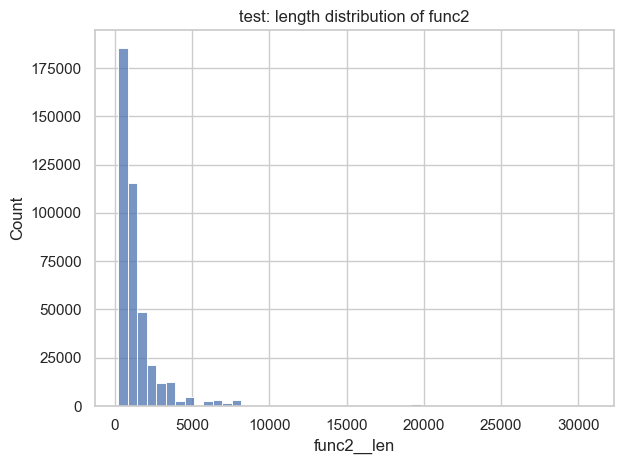

In [25]:
def lengths_stats(df, name):
    for col in ("func1", "func2"):
        if col in df.columns:
            df[f"{col}__len"] = df[col].astype(str).str.len()
            print(f"{name}: {col} length describe")
            display(df[f"{col}__len"].describe())
            sns.histplot(df[f"{col}__len"], bins=50)
            plt.title(f"{name}: length distribution of {col}")
            plt.tight_layout()
            plt.show()

for name, df in [("train", df_train), ("validation", df_val), ("test", df_test)]:
    lengths_stats(df, name)

In [26]:
def inspect_ids(df, name):
    for c in ("id", "id1", "id2"):
        if c in df.columns:
            uniq = df[c].nunique(dropna=False)
            print(f"{name}: {c} unique={uniq} total={len(df)} dup_count={len(df)-uniq}")
    # Дубликаты по паре (id1,id2) 
    if all(c in df.columns for c in ("id1","id2")):
        canon = df.assign(_min_id=np.minimum(df["id1"], df["id2"]),
                          _max_id=np.maximum(df["id1"], df["id2"]))
        dup_pairs = canon.duplicated(["_min_id","_max_id"]).sum()
        print(f"{name}: undirected duplicate pairs =", dup_pairs)

for name, df in [("train", df_train), ("validation", df_val), ("test", df_test)]:
    inspect_ids(df, name)

train: id unique=901028 total=901028 dup_count=0
train: id1 unique=7262 total=901028 dup_count=893766
train: id2 unique=7264 total=901028 dup_count=893764
train: undirected duplicate pairs = 225431
validation: id unique=415416 total=415416 dup_count=0
validation: id1 unique=911 total=415416 dup_count=414505
validation: id2 unique=911 total=415416 dup_count=414505
validation: undirected duplicate pairs = 0
test: id unique=415416 total=415416 dup_count=0
test: id1 unique=911 total=415416 dup_count=414505
test: id2 unique=911 total=415416 dup_count=414505
test: undirected duplicate pairs = 0


In [27]:
def code_quality_checks(df, name):
    for col in ("func1","func2"):
        if col in df.columns:
            empty = df[col].isna().sum()
            blank = (df[col].astype(str).str.strip()=="").sum()
            print(f"{name}: {col} empty={empty} blank={blank}")
    if all(c in df.columns for c in ("func1","func2")):
        same_code = (df["func1"] == df["func2"]).mean()
        print(f"{name}: exact identical func1==func2 ratio = {same_code:.4f}")

for name, df in [("train", df_train), ("val", df_val), ("test", df_test)]:
    code_quality_checks(df, name)

train: func1 empty=0 blank=0
train: func2 empty=0 blank=0
train: exact identical func1==func2 ratio = 0.0013
val: func1 empty=0 blank=0
val: func2 empty=0 blank=0
val: exact identical func1==func2 ratio = 0.0006
test: func1 empty=0 blank=0
test: func2 empty=0 blank=0
test: exact identical func1==func2 ratio = 0.0004


In [29]:
def overlap(a: pd.Series, b: pd.Series):
    return len(set(a.astype(str)) & set(b.astype(str)))

for col in ("id","id1","id2"):
    if col in df_train.columns and col in df_val.columns:
        print(f"Overlap train-val on {col}:", overlap(df_train[col], df_val[col]))
    if col in df_train.columns and col in df_test.columns:
        print(f"Overlap train-test on {col}:", overlap(df_train[col], df_test[col]))
    if col in df_val.columns and col in df_test.columns:
        print(f"Overlap val-test on {col}:", overlap(df_val[col], df_test[col]))

Overlap train-val on id: 415416
Overlap train-test on id: 415416
Overlap val-test on id: 415416
Overlap train-val on id1: 0
Overlap train-test on id1: 0
Overlap val-test on id1: 0
Overlap train-val on id2: 0
Overlap train-test on id2: 0
Overlap val-test on id2: 0


In [4]:
import os
os.chdir(r"C:\Users\Kostya\Desktop\AST_factorization\AST_Factorization")

In [ ]:
from pathlib import Path
import json
import numpy as np
from statistics import mean, median
from src.ast_factorizators.C2V.code2vec import extract_ast_paths

split = "train"  # "train" | "val" | "test"
variant = "normalized"  # "raw" | "normalized"
ast_dir = Path(f"output_ast{'' if variant=='raw' else '_normalized'}/{split}")

max_path_length = 20  
file_limit = None    

files = sorted(ast_dir.glob("*.json"))
if file_limit:
    files = files[:file_limit]

tree_avg_path_lengths = []
empty_trees = 0

for i, fp in enumerate(files, 1):
    try:
        with fp.open("r", encoding="utf8") as f:
            data = json.load(f)
        ast = data.get("ast")
        if ast is None:
            empty_trees += 1
            tree_avg_path_lengths.append(0.0)
            continue

        paths = extract_ast_paths(ast, max_path_length=max_path_length)
        if not paths:
            empty_trees += 1
            tree_avg_path_lengths.append(0.0)
            continue

        path_lengths = [len(p.path) for p in paths]
        tree_avg_path_lengths.append(mean(path_lengths))

    except Exception:
        empty_trees += 1
        tree_avg_path_lengths.append(0.0)

    if i % 1000 == 0:
        print(f"Processed {i}/{len(files)} files")

tree_avg_path_lengths = np.array(tree_avg_path_lengths, dtype=float)

print("\n=== Path-length statistics ===")
print(f"Split              : {split} ({variant})")
print(f"Files processed    : {len(files)}")
print(f"Empty/no-path trees: {empty_trees} ({empty_trees/len(files):.2%})")

print(f"\nPer-tree mean of path length:")
print(f"  Mean    : {float(np.mean(tree_avg_path_lengths)):.4f}")
print(f"  Median  : {float(np.median(tree_avg_path_lengths)):.4f}")
print(f"  10%/90% : {float(np.quantile(tree_avg_path_lengths, 0.10)):.4f} / {float(np.quantile(tree_avg_path_lengths, 0.90)):.4f}")
print(f"  Min/Max : {float(np.min(tree_avg_path_lengths)):.4f} / {float(np.max(tree_avg_path_lengths)):.4f}")

Processed 1000/7302 files
Processed 2000/7302 files
Processed 3000/7302 files
Processed 4000/7302 files
Processed 5000/7302 files
Processed 6000/7302 files
Processed 7000/7302 files

=== Path-length statistics ===
Split              : train (normalized)
Files processed    : 7302
Empty/no-path trees: 0 (0.00%)

Per-tree mean of path length:
  Mean    : 10.6294
  Median  : 10.4640
  10%/90% : 8.5470 / 13.0302
  Min/Max : 4.0000 / 16.2938
